# Zad. - filtrowanie dźwięku

In [5]:
import numpy as np
import tempfile
import os
import os.path
import wave
from IPython.display import Audio, display
import matplotlib.pylab as plt
from scipy import stats

In [6]:
import librosa

# Zad.
Proszę 
 * wczytać 
 * odsłuchać 
 * narysować
 
dane z plik  ja1.wav.

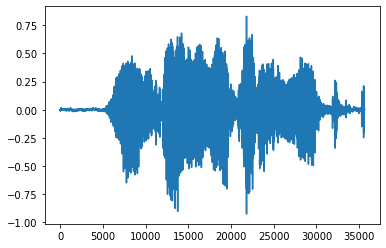

In [7]:
file = 'ja1.wav'

x, fs = librosa.load(file)
plt.plot(x)
plt.show()

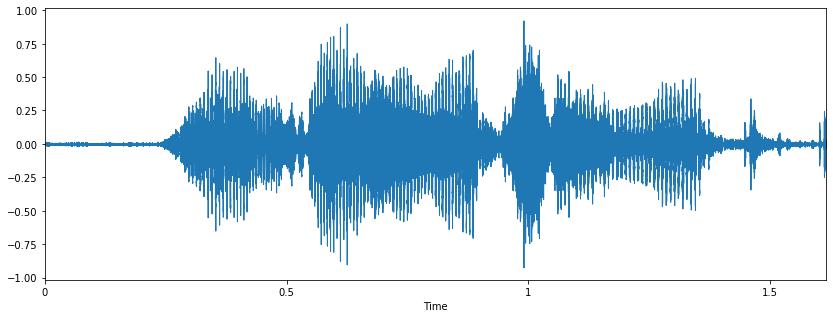

In [8]:
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=fs)
plt.show()

In [9]:
import IPython.display as ipd
ipd.Audio(file) # load a local WAV file

In [10]:
ipd.Audio(x, rate=fs) # load a NumPy array

# Zad.
Proszę dokonać transformaty Fouriera. 

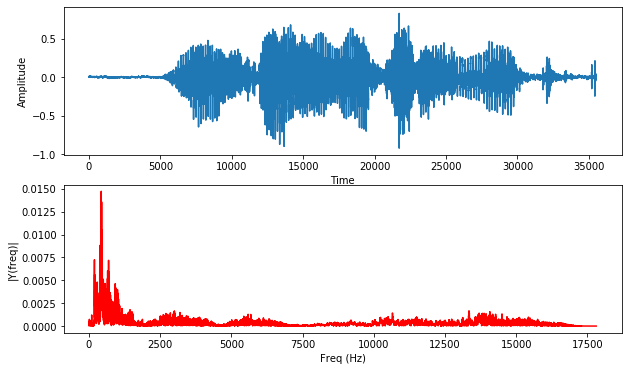

In [11]:
n = len(x) # length of the signal
Y = np.fft.fft(x)/n # fft computing and normalization
z = np.fft.ifft(Y)*n # ifft computing and normalization
frq = np.arange(0,n/2) # one side frequency range
Y = Y[range(np.int(n/2))]

fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(x[100:n])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq[0:30000],abs(Y)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

(513, 140)


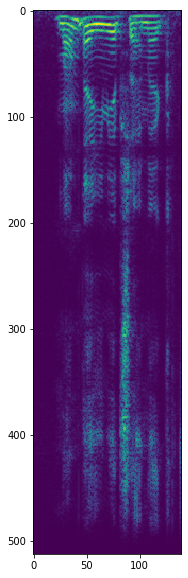

In [12]:
WINDOW_SIZE = 1024
y = librosa.stft(x, n_fft = WINDOW_SIZE)#, hop_length = 512)

y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(10, 10))
plt.imshow(y)
plt.show()

# Zad.
Proszę 
 * **dodać szum gaussowski** 
 ```python
 stats.norm(0,0.01).rvs(len(x))
 ```

In [13]:
x_noise = x + stats.norm(0,0.1).rvs(len(x)) 

In [14]:
ipd.Audio(x_noise, rate=fs) # load a NumPy array

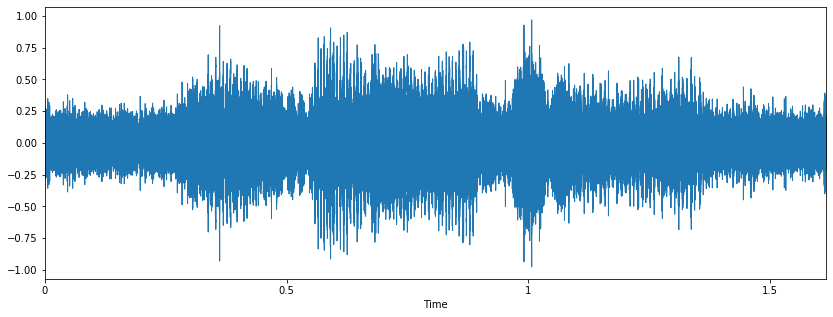

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x_noise, sr=fs)
plt.show()

In [16]:
n = len(x_noise) # length of the signal
Y_noise = np.fft.fft(x_noise)/n # fft computing and normalization

frq = np.arange(0,n/2) # one side frequency range
#Y_noise = Y_noise[range(np.int(n/2))]

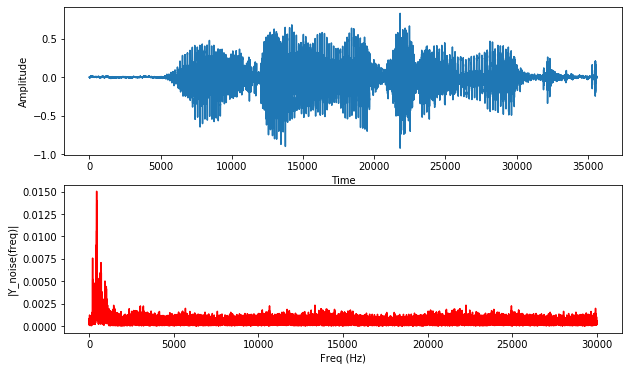

In [17]:
fig, ax = plt.subplots(2, 1,figsize=(10,6))
ax[0].plot(x)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(abs(Y_noise)[0:30000],'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y_noise(freq)|')
plt.show()

(513, 140)


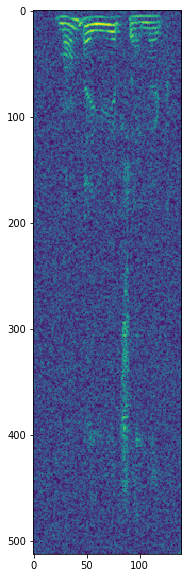

In [18]:
WINDOW_SIZE = 1024
y_noise = librosa.stft(x_noise, n_fft = WINDOW_SIZE)#, hop_length = 512)

y_noise = np.log1p(np.abs(y_noise))
print(y_noise.shape)

plt.figure(figsize=(10, 10))
plt.imshow(y_noise)
plt.show()

# Zad

Proszę 
* wygenerować 
* narysować linie dźwięku 
* narysować spektogram 

dla

* sygnału w kształcie sinusa
* sygnał będącą mieszaniną dźwięków
* sygnału dla dwóch rożnych amplitud
* sygnału zwiększającej się częstotliwości **sin(nx)**


In [19]:
import numpy
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

In [20]:
ipd.Audio(x, rate=sr) # load a NumPy array

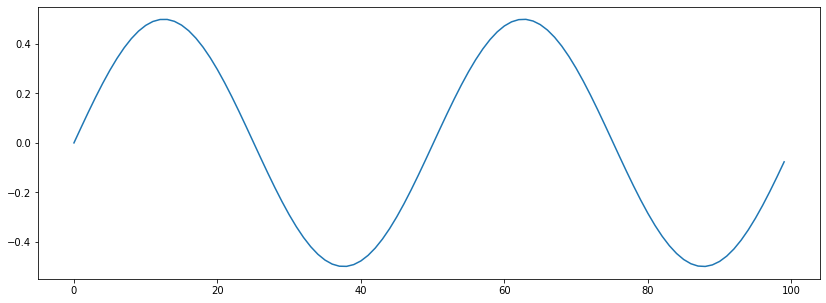

In [21]:
plt.figure(figsize=(14, 5))
plt.plot(x[0:100])
plt.show()

(513, 173)


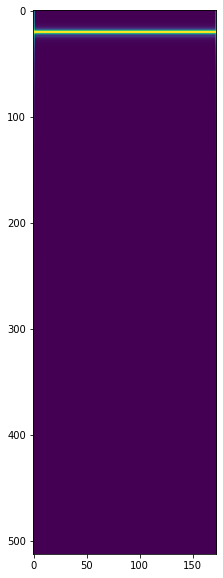

In [22]:
WINDOW_SIZE = 1024
y = librosa.stft(x, n_fft = WINDOW_SIZE)#, hop_length = 512)

y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(10, 10))
plt.imshow(y)
plt.show()

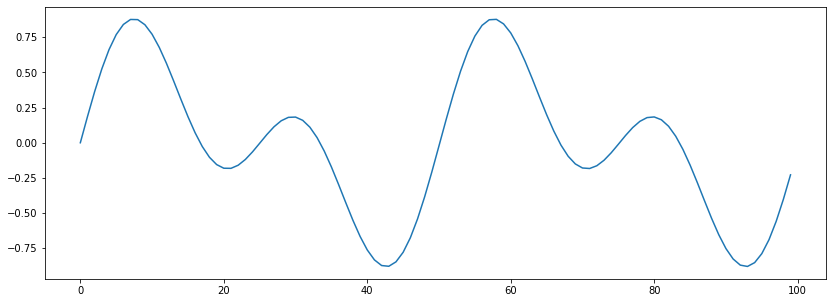

(513, 173)


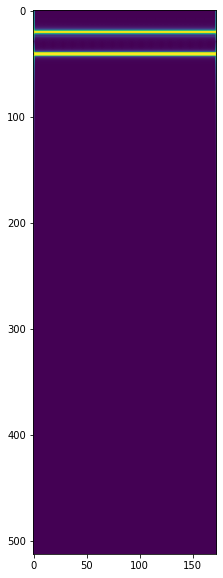

In [23]:
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)+0.5*numpy.sin(4*numpy.pi*440*t)  

plt.figure(figsize=(14, 5))
plt.plot(x[0:100])
plt.show()

WINDOW_SIZE = 1024
y = librosa.stft(x, n_fft = WINDOW_SIZE)#, hop_length = 512)

y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(10, 10))
plt.imshow(y)
plt.show()

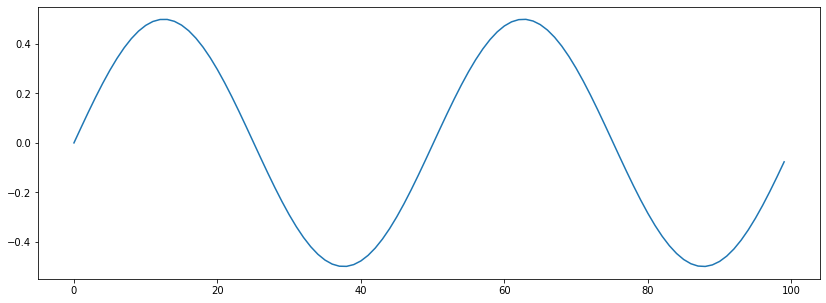

(513, 345)


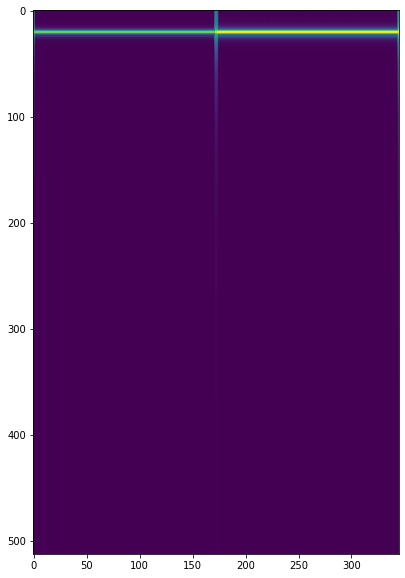

In [24]:
sr = 22050 # sample rate
T = 2.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = np.concatenate((0.5*numpy.sin(2*numpy.pi*440*t),1.8*numpy.sin(2*numpy.pi*440*t))  )

plt.figure(figsize=(14, 5))
plt.plot(x[0:100])
plt.show()

WINDOW_SIZE = 1024
y = librosa.stft(x, n_fft = WINDOW_SIZE)#, hop_length = 512)

y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(10, 10))
plt.imshow(y)
plt.show()

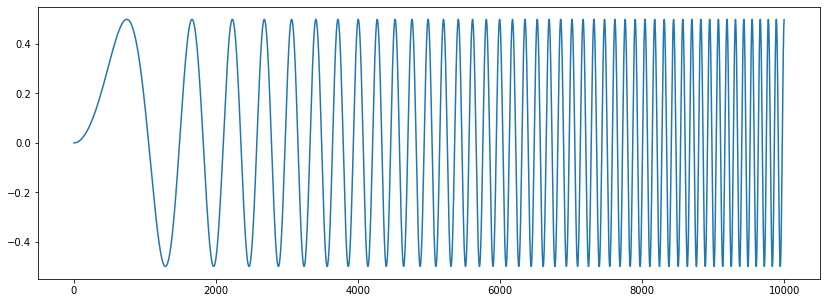

(513, 862)


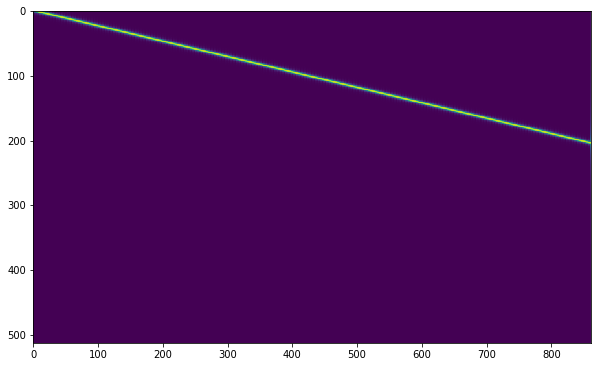

In [25]:
sr = 22050 # sample rate
T = 10.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(t*numpy.pi*440*t)

plt.figure(figsize=(14, 5))
plt.plot(x[0:10000])
plt.show()

WINDOW_SIZE = 1024
y = librosa.stft(x, n_fft = WINDOW_SIZE)#, hop_length = 512)

y = np.log1p(np.abs(y))
print(y.shape)

plt.figure(figsize=(10, 10))
plt.imshow(y)
plt.show()

In [27]:
ipd.Audio(x, rate=sr) # load a NumPy array